<a href="https://colab.research.google.com/github/prakruti-sid/Credit-Modelling-Using-ML/blob/main/Credit_Modelingv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Modelling 💰 

# Introduction

In this project we will be working on 
`Credit Modelling` 💰

A field of data science that focuses on modelling a borrower's credit risk.

We will use financial lending data from `LendingClub`, a US peer-to-peer lending company. 

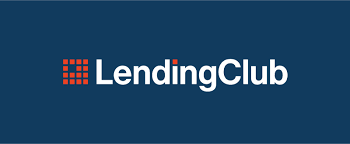




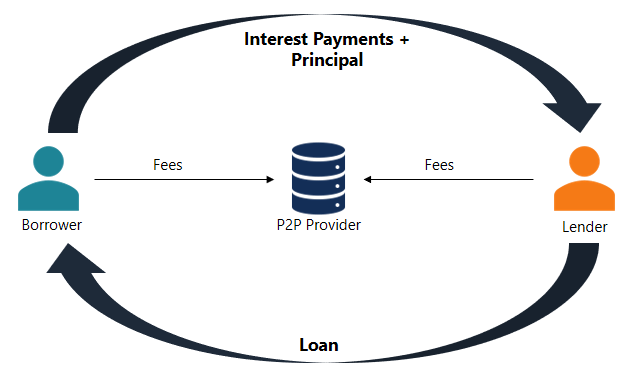

> Lending Club is a marketplace for personal loans that `matches borrowers who are seeking a loan with investors looking to lend money and make a return.` 




**Useful Links** ➡
- [About Lending Club](https://www.lendingclub.com/)
- [Lending Club Data on Approved and Rejected Loans](https://www.lendingclub.com/investing/peer-to-peer)


**Borrower Evaluation** 

LC evaluates each borrower's credit score using past historical data and their own data science process to `assign an interest rate to the borrower.` 


> Tot $ Borrower Owes = (The interest rate) * Loan Amount + Loan Amount  

[Interest Calculations](https://www.lendingclub.com/loans/personal-loans/rates-fees)

**Interest Rate**

- Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back. 
   - A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. 
   - The interest rates range from 5.32% all the way to 30.99% and each borrower is given a grade according to the interest rate they were assigned.


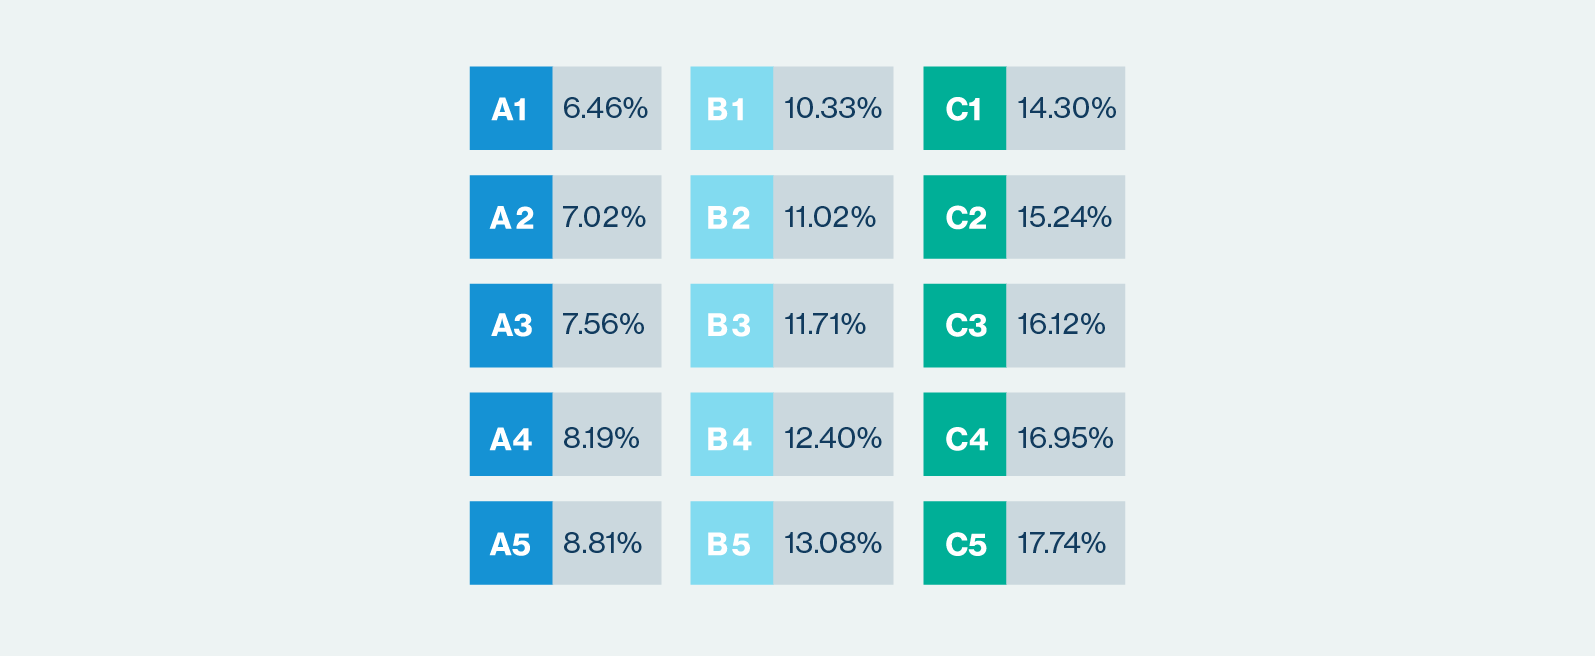

#### Problem Statement : 
To build a machine learning model that can `accurately predict if` a `borrower will pay off their loan on time or not`.

## Libraries

In [214]:
# Libraries

import pandas as pd
import numpy as np 

#import plotting + diagram tools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display= 'diagram')
import plotly.offline as py
%matplotlib inline

#resampling library
from imblearn.over_sampling import SMOTE

#import some necessary tools
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score,cross_val_predict
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, \
StandardScaler
from sklearn.impute import SimpleImputer

#import evaluation metrics: accuracy, precision, recall, classification report, and confusion matrix scoring functions

from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, classification_report,confusion_matrix,plot_confusion_matrix, \
roc_auc_score, ConfusionMatrixDisplay,PrecisionRecallDisplay, RocCurveDisplay
import sklearn.metrics as metrics

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings(action='once')

# Preparing Dataset for ML 🧱

### About the Dataset


LC releases the followinging data
- LoanStats - Approved Loans Dataset
- RejectStats - Rejected Loans Dataset 

We will be focusing on the `Approved Loans from 2007-2011 `for this project 
(This will ensure enough loans that are paid off ) 

[Kaggle Lending Club Data](https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz)

#### Data Dictionary 📔

Compiled using   
[Lending Club's Data Dictionary](https://docs.google.com/spreadsheets/d/e/2PACX-1vTo6P6lWvTNyLH80v9YjUSY6fzgGvkiBZ9kYXNFzMr2J2IKxhdXpCwuVI0Sl_s9L1bJKPDz1msG_Cyb/pub?output=csv)


 Name          | Description         |  Dtype |  Possible Values
 ------------- | ------------------- | ---------------- | -----
 `id`  | A unique LC assigned ID for the loan listing. |      object
 `member_id` | A unique LC assigned Id for the borrower member |     float64 | 
 `loan_amnt `| The listed amount of the loan applied for by the borrower. | float64 | 
`funded_amnt`  | The total amount committed to that loan at that point in time. | float64 | 
`funded_amnt_inv` |The total amount committed by investors for that loan at that point in time. | float64 | 
`term` |The number of payments on the loan. | object | Values are in months and can be either 36 or 60.
`int_rate` | Interest Rate on the loan | object |  
`installment` | The monthly payment owed by the borrower if the loan originates. | float64 | 
`grade` | LC assigned loan grade for borrower | object |
`sub_grade` | LC assigned loan subgrade | object |
`emp_title` |The job title supplied by the Borrower when applying for the loan. | object
`emp_length` | Employment length in years. | object | Varies from 0 to 10 where 0 = < 1 year & 10 = > 10 years.
`home_ownership`	| 	The home ownership status provided by the borrower during registration. | object | RENT, OWN, MORTGAGE, OTHER.
`annual_inc` | The self-reported annual income provided by the borrower during registration. | float64 | 
`verification_status`	| Indicates if income was verified | object| Verified by LC, Not verified, or Income source verified | 
`issue_d` | The month which the loan was funded | object | 
`loan_status` | Current status of the loan | object | Charged Off , In Process, On Time Payments 
`pymnt_plan` |Indicates if a payment plan has been put in place for the loan | object | y /n 
`purpose` | A category provided by the borrower for the loan request. | object | Car, House , Home Repairs etc. 
`title`	| The loan title provided by the borrower |object| Computer	
`zip_code` |The first 3 numbers of the zip code provided by the borrower in the loan application. | 	object	| 940xx [Indicates State Only]
`addr_state` | The state provided by the borrower in the loan application | object |	AZ / MA / TX
`dti` |	A ratio calculated using the borrower’s total monthly debt payments | | 
    | on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s 
    | self-reported monthly income. |  float64	|
`delinq_2yrs`	| The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years | float64 | 
`earliest_cr_line` |	The month the borrower's earliest reported credit line was opened | object |	Jan-1985	
`inq_last_6mths` |The number of inquiries in past 6 months (excluding auto and mortgage inquiries) | float64	
`open_acc` | The number of open credit lines in the borrower's credit file. | 	float64	
`pub_rec`	| Number of derogatory public records | float64	
`revol_bal` | Total credit revolving balance | float64	|	
`revol_util` | Revolving line utilization rate, or the amount of credit the borrower is using relative to
|  all available revolving credit.| object	 
`total_acc` |	The total number of credit lines currently in the borrower's credit file| float64	| 	
`initial_list_status`	| The initial listing status of the loan. |object |Possible values are – W, F
`out_prncp`| Remaining outstanding principal for total amount funded |	float64	0	
`out_prncp_inv` |	Remaining outstanding principal for portion of total amount funded by investors | float64 |		
`total_pymnt`	|Payments received to date for total amount funded |  float64 |
`total_pymnt_inv`	| Payments received to date for portion of total amount funded by investors | float64
`total_rec_prncp`	| Principal received to date | float64	
`total_rec_int`	|	Interest received to date | float64	|
`total_rec_late_fee` | Late fees received to date | float64	|
`recoveries` | post charge off gross recovery |	float64	
`collection_recovery_fee`	| post charge off collection fee | float64	
`last_pymnt_d` | Last month payment was received | object	|Jan-2015	
`last_pymnt_amnt`	|Last total payment amount received | float64
`last_credit_pull_d`	|	The most recent month LC pulled credit for this loan | object	Jun-2016
`collections_12_mths_ex_med` | Number of collections in 12 months excluding medical collections | 	float64	
`policy_code`	|publicly available policy_code=1 new products not publicly available policy_code=2 | float64	
`application_type`	| Indicates whether the loan is an individual application or a joint application with two co-borrowers | object	|INDIVIDUAL	
`acc_now_delinq` |The number of accounts on which the borrower is now delinquent. | float64	
`chargeoff_within_12_mths` |Number of charge-offs within 12 months | 	float64	
`delinq_amnt`	| The past-due amount owed for the accounts on which the borrower is now delinquent. | float64	
`pub_rec_bankruptcies`	| Number of public record bankruptcies | float64	
`tax_liens`	| Number of tax liens | float64	0	

## 1. Loading The Dataset 🏗

In [215]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS1OX6ulf8Ue-fDUjqSx0otXwg8MTehIma9qTE1GIJPpS5GzTBr7AzIAoP_WDQ28vpPYD80NqgX-F09/pub?output=csv'

In [216]:
lc_data = pd.read_csv(url)
lc_data.drop_duplicates()

lc_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [217]:
rows = lc_data.shape[0]
cols = lc_data.shape[1]
print(f'No. of Cols / Features : {cols}')
print(f'No. of Rows : {rows}')

No. of Cols / Features : 52
No. of Rows : 42538


In [218]:
#lc_data.info()

In [219]:
# Copy of the Dataset
lc = lc_data.copy()

## Preparing the Data ⤵ ⤴

### Exploring the Features 🔬

#### Dropping columns ✂




Used [Markup Tables Generator](https://www.tablesgenerator.com/markdown_tables)



```
Redundent / Unneccessary columns
```
These columns don't affect a borrower's ability to pay back a loan



 Name          | Description         |   Reason
 ------------- | ------------------- | ---------------- 
 `id`  | A unique LC assigned ID for the loan listing. |      Unnecessary
 `member_id` | A unique LC assigned Id for the borrower member |     Unnecessary
`grade` | LC assigned loan grade for borrower | Redundant as the interest rate column `int_rate`
`sub_grade` | LC assigned loan subgrade | Using `int_rate` because numerical category **>** categorical for modeling
`zip_code` | The first 3 numbers of the zip code provided by the borrower (Indicates State) | Redundent with `addr_state` 







```
Discloses Information from the Future**
```
Information available only after the loan is funded which would result in Data Leakage.



Name          | Description    | Reason        
------------- | -------------- | -------------- 
`funded_amnt`  | The total amount committed to that loan at that point in time. | Data Leakage | 
`funded_amnt_inv` |The total amount committed by investors for that loan at that point in time. | Data Leakage | 
`issue_d` | The month which the loan was funded | Information about the Future | 
`out_prncp`| Remaining outstanding principal for total amount funded|Describes properties of the loan after funding |
`out_prncp_inv` | Remaining outstanding principal for portion of total amount funded by investors| Describes properties of the loan after funding|
`total_pymnt` | Payments received to date for total amount funded | Describes properties of the loan after funding|
`total_pymnt_inv` |Payments received  for portion of total amount funded by investors | Describes properties of the loan after funding|
`total_rec_prncp` | Principal received to date | Describes properties of the loan after funding| 
`total_rec_int` | Interest received to date| Aspects of fully funded loan & divulges buyer's credit wothy-ness |
`total_rec_late_fee` | Late fees received to date| Aspects of fully funded loan & divulges buyer's credit wothy-ness| 
`recoveries` | post charge off gross recovery | Aspects of fully funded loan & divulges buyer's credit wothy-ness| $
`collection_recovery_fee` | post charge off collection fee | Aspects of fully funded loan & divulges buyer's credit wothy-ness|
`last_pymnt_d` | Last month payment was received| Aspects of fully funded loan & divulges buyer's credit wothy-ness|
`last_pymnt_amnt` | Last total payment amount received| Aspects of fully funded loan & divulges buyer's credit wothy-ness|

```
Insufficiant Data
```

Needs more data or a lot of processing to turn into a useful feature.

Name          | Description    | Reason   
------------- | --------------- | -------------- 
`emp_title` |The job title supplied by the Borrower when applying for the loan. | Many Missing Values - Will require a lot of processing to be useful|



Dropping Columns based on the above analysis

In [220]:
lc = lc.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)

In [221]:
lc = lc.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp","total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1)

#### The New Dataset

In [222]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

In [223]:
# First Row of features
lc.iloc[0]

loan_amnt                          5000.0
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                        24000.0
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                           0.0
earliest_cr_line                   Jan-85
inq_last_6mths                        1.0
open_acc                              3.0
pub_rec                               0.0
revol_bal                         13648.0
revol_util                         83.70%
total_acc                             9.0
initial_list_status                     f
last_credit_pull_d                

Now the dataset has 32 columns

#### Setting up the Target 🌠

We will use the `loan_status` feature as the `target`

Loan Status	| Meaning
-----------| -----------
Fully Paid	| Loan has been fully paid off.
Charged Off	| Loan for which there is no longer a reasonable expectation of further payments.
Does not meet the credit policy /  Status:Fully Paid	| Fully Paid loan that no longer meets the credit policy & wouldn't be approved on to the marketplace.
Does not meet the credit policy / Status:Charged Off	| Charged off loan that no longer meets the credit policy & wouldn't be approved on to the marketplace.
In Grace Period	|	The loan is past due but still in the grace period of 15 days.
Late (16-30 days)	| Loan hasn't been paid in 16 to 30 days (late on the current payment).
Late (31-120 days)	|Loan hasn't been paid in 31 to 120 days (late on the current payment).
Current	|	Loan is up to date on current payments.
Default	 | Loan is defaulted on and no payment has been made for more than 121 days.

In [224]:
lc['loan_status'].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

We will focus only on the first 2 categories :
- Fully Paid
- Charged Off 

    - As the 3rd and 4th categories will no longer be approved, it holds no value in our predictive model. 
    - The rest of the categories are still in the process of being determined which category they fall into. 

``` This has now become a Binary Classification problem ```

In [225]:
# Copy of the df with the filtered features 
df = lc.copy()

In [226]:
# Dropping all rows with values other than 'Fully Paid" OR 'Charged Off"

df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [227]:
df['loan_status'].value_counts()

Fully Paid     33136
Charged Off     5634
Name: loan_status, dtype: int64

In [228]:
# Since it's only two categories, replace Fully charged =1 & Charged Off = 0

tar_dict = {
    'loan_status' : {
        'Fully Paid' : 1,
        'Charged Off' : 0,
    }
}
df = df.replace(tar_dict)

In [229]:
df['loan_status'].value_counts(normalize=True)

1    0.854681
0    0.145319
Name: loan_status, dtype: float64

- Target is a bit imbalanced. Need to account for overfitting while training.



### Preparing Features 🔎

In [230]:
for col in df.select_dtypes(include='object').columns:
  display(df[col].value_counts())
  print('\n')

36 months    29096
60 months     9674
Name: term, dtype: int64

10.99%    928
11.49%    795
7.51%     787
13.49%    760
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

10+ years    8547
< 1 year     4527
2 years      4308
3 years      4026
4 years      3362
5 years      3209
1 year       3183
6 years      2181
7 years      1718
8 years      1444
9 years      1229
Name: emp_length, dtype: int64

RENT        18550
MORTGAGE    17127
OWN          2992
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Not Verified       16732
Verified           12301
Source Verified     9737
Name: verification_status, dtype: int64

n    38770
Name: pymnt_plan, dtype: int64

debt_consolidation    18145
credit_card            5042
other                  3880
home_improvement       2902
major_purchase         2161
small_business         1766
car                    1512
wedding                 930
medical                 682
moving                  578
vacation                376
house                   369
educational             325
renewable_energy        102
Name: purpose, dtype: int64

Debt Consolidation         2177
Debt Consolidation Loan    1644
Personal Loan               658
Consolidation               512
debt consolidation          505
                           ... 
Joel Home Improvement         1
business inventory            1
Farrah's house                1
Fencing Loan                  1
JAL Loan                      1
Name: title, Length: 19085, dtype: int64

CA    6968
NY    3715
FL    2794
TX    2672
NJ    1803
IL    1484
PA    1477
VA    1377
GA    1364
MA    1302
OH    1184
MD    1028
AZ     854
WA     823
CO     771
NC     754
CT     730
MI     712
MO     672
MN     606
NV     482
SC     462
WI     442
AL     438
OR     437
LA     430
KY     315
OK     291
KS     261
UT     254
AR     238
DC     211
RI     196
NM     184
WV     172
HI     167
NH     166
DE     114
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

Oct-99    360
Nov-98    358
Oct-00    341
Dec-98    340
Dec-97    321
         ... 
Oct-54      1
Feb-66      1
Mar-63      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

0%        960
0.20%      63
63%        62
40.70%     58
66.70%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

f    38770
Name: initial_list_status, dtype: int64

Jun-16    10737
Mar-16     1059
Apr-16      865
Feb-13      839
May-16      736
          ...  
Jul-08        1
May-08        1
Jun-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 107, dtype: int64

INDIVIDUAL    38770
Name: application_type, dtype: int64

#### 1.Dropping columns with only one unique value 🛃

In [231]:
# Reference : https://stackoverflow.com/questions/46218652/python-pandas-unique-value-ignoring-nan
cols_orig = df.columns
drop_cols = []

for col in cols_orig:
    unique_non_nan = df[col].dropna().unique() # df[col].unique() counts 0 & null as a unique value, so first dropping nulls
    if len(unique_non_nan) == 1:
        drop_cols.append(col) # Cols with only 1 value added to drop_cols list

print(drop_cols)
df = df.drop(drop_cols, axis=1)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [232]:
# Number of dropped columns :
print(len(drop_cols))

9


In [233]:
# Copy of the dataset with the final features

dff = df.copy()

#### 2. Dealing with missing values ⬜

In [234]:
nulls = dff.isna().sum()
print(nulls[nulls >0])

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [235]:
# Exploring the pub_rec column : 
dff['pub_rec_bankruptcies'].value_counts(normalize=True, dropna = False).round(2)

0.0    0.94
1.0    0.04
NaN    0.02
2.0    0.00
Name: pub_rec_bankruptcies, dtype: float64

In [236]:
# Values are too concentrated on 0. dropping this col
dff = dff.drop('pub_rec_bankruptcies',axis=1)

In [237]:
# Dropping rows with missing values

dff = dff.dropna(axis =0)

#### 3. Checking Data Types - String ➡ Numerical

In [238]:
# Columns of each datatype 
dff.dtypes.value_counts()

object     11
float64    10
int64       1
dtype: int64

In [239]:
# First row of object dtype columns

obj_cols = dff.select_dtypes(include='object')
print(len(obj_cols))
print(obj_cols.iloc[0])

37675
term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line            Jan-85
revol_util                  83.70%
last_credit_pull_d          Jun-16
Name: 0, dtype: object


In [240]:
# Drilling down into the first set of object columns : 
obj1 = ['home_ownership', 'verification_status', 'emp_length', 'int_rate','revol_util','term', 'addr_state', 'title', 'purpose']

for c in obj1:
    print(dff[c].value_counts())
    print('\n')

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64


Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64


10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64


10.99%    906
11.49%    770
7.51%     756
13.49%    747
7.88%     701
         ... 
16.01%      1
10.64%      1
17.34%      1
16.71%      1
17.46%      1
Name: int_rate, Length: 371, dtype: int64


0%        924
0.20%      62
63%        61
40.70%     57
66.70%     56
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: revol_util, Length: 1086, dtype: int64


36 months    28234
60 months     9441
Name: term, dtype: int64


CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    

Converting `emp_length` to a numerical feature 

In [241]:
# Mappin dict :

mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}

dff = dff.replace(mapping_dict)

Converting `int_rate` & `revol_util` to numerical col 

In [242]:
dff['int_rate']= dff['int_rate'].str.rstrip('%').astype('float')
dff['revol_util']= dff['revol_util'].str.rstrip('%').astype('float')

In [243]:
dfplt = dff.copy()

#### 4. Further eliminating Features

- Avoiding Date-Time Features for simplicity
    - `earliest_cr_line`
    - `last_credit_pull_d`
- `purpose` & `title` 
    -  Similar columns. `purpose` is cleaner with a few disticnt categories so will `drop` `title` column.

In [244]:
# Dropping date columns in order to avoid Date-Time complications
dff = dff.drop(['earliest_cr_line', 'last_credit_pull_d'], axis = 1)

In [245]:
dff = dff.drop(['title'], axis = 1)

Too Many Distincts 😨

- `addr_state` : With 50 states, that will be 50 features/columns nominally encoded. Dropping `addr_state`

In [246]:
dff = dff.drop(['addr_state'], axis = 1)

In [247]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37675 non-null  float64
 1   term                 37675 non-null  object 
 2   int_rate             37675 non-null  float64
 3   installment          37675 non-null  float64
 4   emp_length           37675 non-null  int64  
 5   home_ownership       37675 non-null  object 
 6   annual_inc           37675 non-null  float64
 7   verification_status  37675 non-null  object 
 8   loan_status          37675 non-null  int64  
 9   purpose              37675 non-null  object 
 10  dti                  37675 non-null  float64
 11  delinq_2yrs          37675 non-null  float64
 12  inq_last_6mths       37675 non-null  float64
 13  open_acc             37675 non-null  float64
 14  pub_rec              37675 non-null  float64
 15  revol_bal            37675 non-null 

#### Further transformations

Encoding the Categorical columns 



> These categories have a handful of distinct values. We will go ahead and `encode` these:
- `home_ownership`
- `verification_status`
-  `purpose`
-  `term`

In [248]:
cat_columns = ['home_ownership', 'verification_status', 'purpose', 'term']
dummy_df = pd.get_dummies(dff[cat_columns])
dff_encoded = pd.concat([dff, dummy_df], axis =1)
dff_encoded = dff_encoded.drop(cat_columns, axis = 1)

In [249]:
# https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns
dff_encoded

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_36 months,term_60 months
0,5000.0,10.65,162.87,10,24000.0,1,27.65,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,0,30000.0,0,1.00,0.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,10,12252.0,1,8.72,0.0,2.0,2.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,10,49200.0,1,20.00,0.0,1.0,10.0,...,0,0,0,1,0,0,0,0,1,0
5,5000.0,7.90,156.46,3,36000.0,1,11.20,0.0,3.0,9.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,8.07,78.42,4,110000.0,1,11.33,0.0,0.0,13.0,...,0,0,0,0,0,0,0,0,1,0
39782,8500.0,10.28,275.38,3,18000.0,1,6.40,1.0,1.0,6.0,...,0,0,0,0,0,0,0,0,1,0
39783,5000.0,8.07,156.84,0,100000.0,1,2.30,0.0,0.0,11.0,...,0,0,0,0,0,0,0,0,1,0
39784,5000.0,7.43,155.38,0,200000.0,1,3.72,0.0,0.0,17.0,...,0,0,0,1,0,0,0,0,1,0


#### Wrapping Up 

In [250]:
dff.shape[0] / lc_data.shape[0]

0.885678687291363

In [251]:
# Target Balance
dff['loan_status'].value_counts(normalize = True).round(2)

1    0.86
0    0.14
Name: loan_status, dtype: float64



> After most eliminations we are going ahead with about `88% of our initial dataset`

> `Target` has a `Binary Classification `with `86% - 14%` spread



## Data Visualization  📊

#### Setting Up

In [252]:
%matplotlib inline
import matplotlib.style as style
style.available 

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [253]:
%%bash
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
dfplt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37675 non-null  float64
 1   term                 37675 non-null  object 
 2   int_rate             37675 non-null  float64
 3   installment          37675 non-null  float64
 4   emp_length           37675 non-null  int64  
 5   home_ownership       37675 non-null  object 
 6   annual_inc           37675 non-null  float64
 7   verification_status  37675 non-null  object 
 8   loan_status          37675 non-null  int64  
 9   purpose              37675 non-null  object 
 10  title                37675 non-null  object 
 11  addr_state           37675 non-null  object 
 12  dti                  37675 non-null  float64
 13  delinq_2yrs          37675 non-null  float64
 14  earliest_cr_line     37675 non-null  object 
 15  inq_last_6mths       37675 non-null 

### Exploratory Data Analysis 🌍

In [255]:
# Get means of all the features grouped by the'purpose' column

loan_categories = dfplt.groupby('purpose')
cat_means = loan_categories.mean()
cat_means.reset_index()

,purpose,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,car,6789.787526,10.529602,191.610939,4.883482,62767.304688,0.894448,11.136388,0.152844,0.882796,8.588759,0.056203,10755.300891,36.698067,20.662783
1,credit_card,11647.587049,11.661529,347.828176,4.884952,70933.354958,0.896151,14.591523,0.106496,0.749745,9.840562,0.054571,17473.441458,56.558108,22.995928
2,debt_consolidation,12596.525548,12.427271,366.357274,5.026477,67595.744983,0.849135,14.441158,0.134584,0.826320,9.686384,0.055433,14610.107769,54.013718,22.853642
3,educational,6914.743590,11.651154,221.786763,3.509615,54175.963397,0.833333,11.306410,0.150641,1.115385,8.964744,0.041667,9741.051282,39.081731,18.602564
4,home_improvement,11416.497507,11.322041,321.715837,5.815171,90885.776724,0.883191,11.085741,0.176994,1.105769,9.452991,0.061966,12281.947293,36.429398,24.223291
5,house,12889.115169,12.331124,370.282388,4.842697,77814.697079,0.834270,10.647640,0.171348,1.508427,8.514045,0.053371,9474.856742,35.682303,21.115169
6,major_purchase,8118.566971,10.830490,236.076524,4.715795,66922.873159,0.899184,10.766860,0.169467,0.848296,8.219875,0.039846,8821.009602,35.671243,19.842535
7,medical,8185.190840,11.505160,236.488901,5.068702,68599.770427,0.847328,12.261649,0.209160,0.925191,9.076336,0.083969,10301.082443,42.386916,21.694656
8,moving,6636.503623,11.559801,195.980906,3.637681,62854.031069,0.847826,11.635254,0.166667,0.900362,8.237319,0.038043,7545.331522,44.410326,18.967391
9,other,8025.262732,11.759623,237.948060,4.756400,63816.535376,0.840474,12.266454,0.179736,0.907572,8.400431,0.044193,10538.104285,45.605395,19.844516


Drilling into the Distribution of the following Features :

In [256]:
grid_avg = dfplt[['loan_amnt', 'installment', 'dti', 'int_rate','term', 
            'home_ownership','open_acc','inq_last_6mths', 'annual_inc','emp_length', 'purpose','loan_status']]

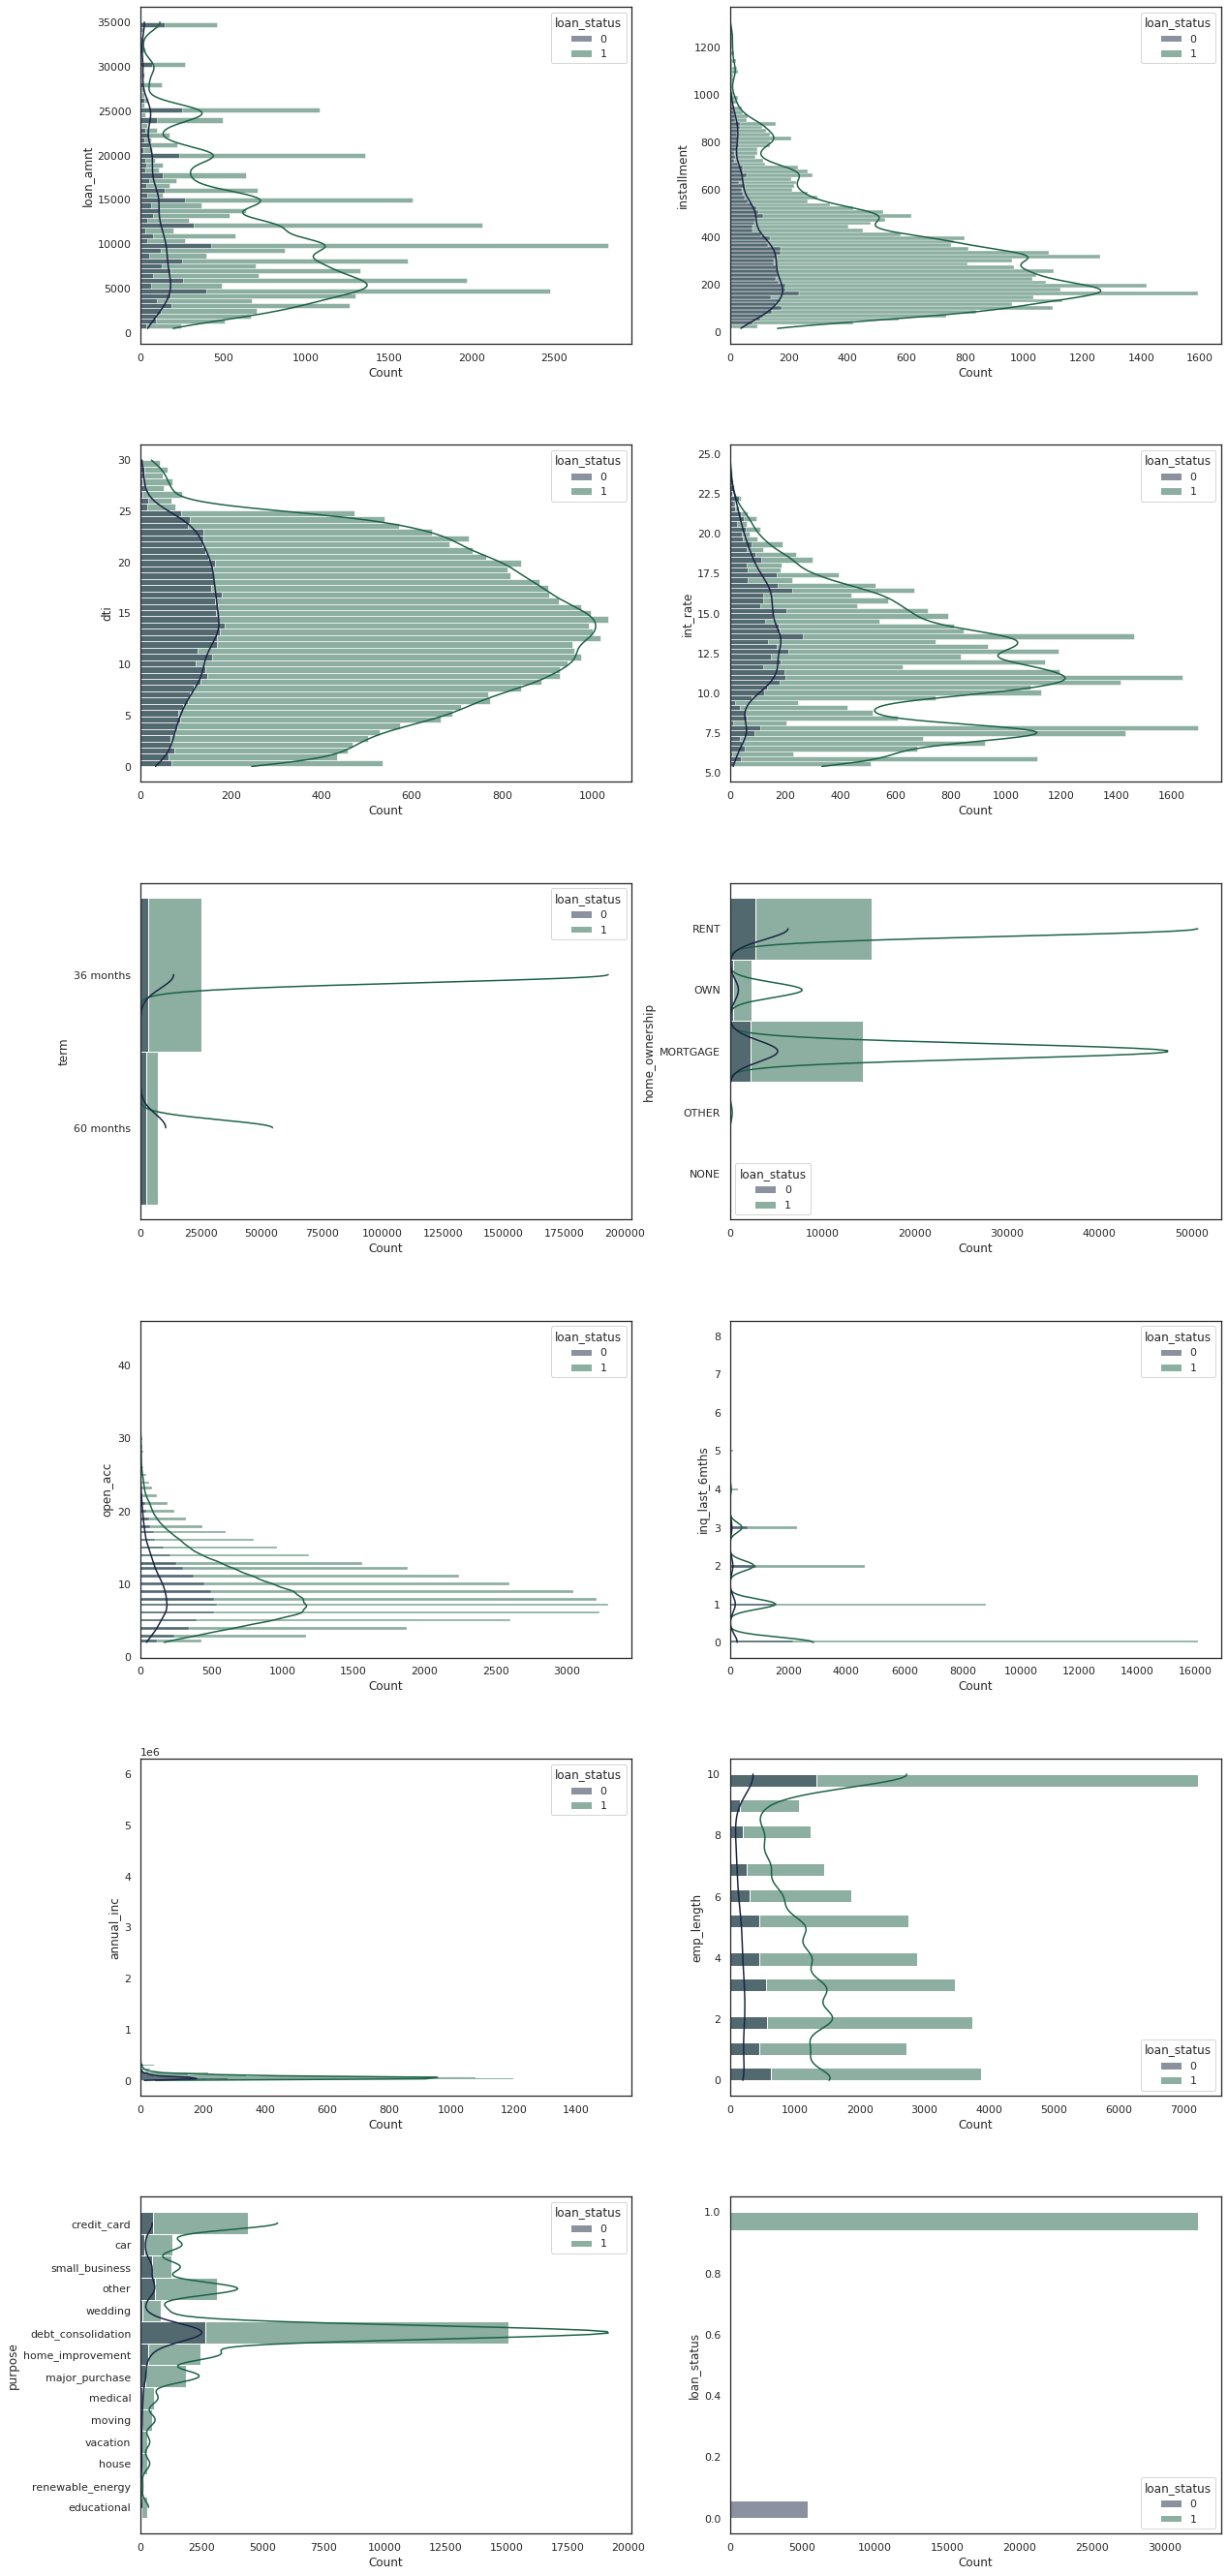

In [257]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,48
sns.set(font_scale = 1)
sns.set_style("white")
color = sns.set_palette("cubehelix")
plt.subplots_adjust(hspace=0.3)
i = 1;
for c in grid_avg:
    plt.subplot(6,2,i)
    sns.histplot(data=grid_avg, y=c, hue="loan_status",kde=True,palette=color)
    i = i + 1

Relationship of `Loan Needs`, `int_rate` & the borrrower's `Debt to Income Ratio`

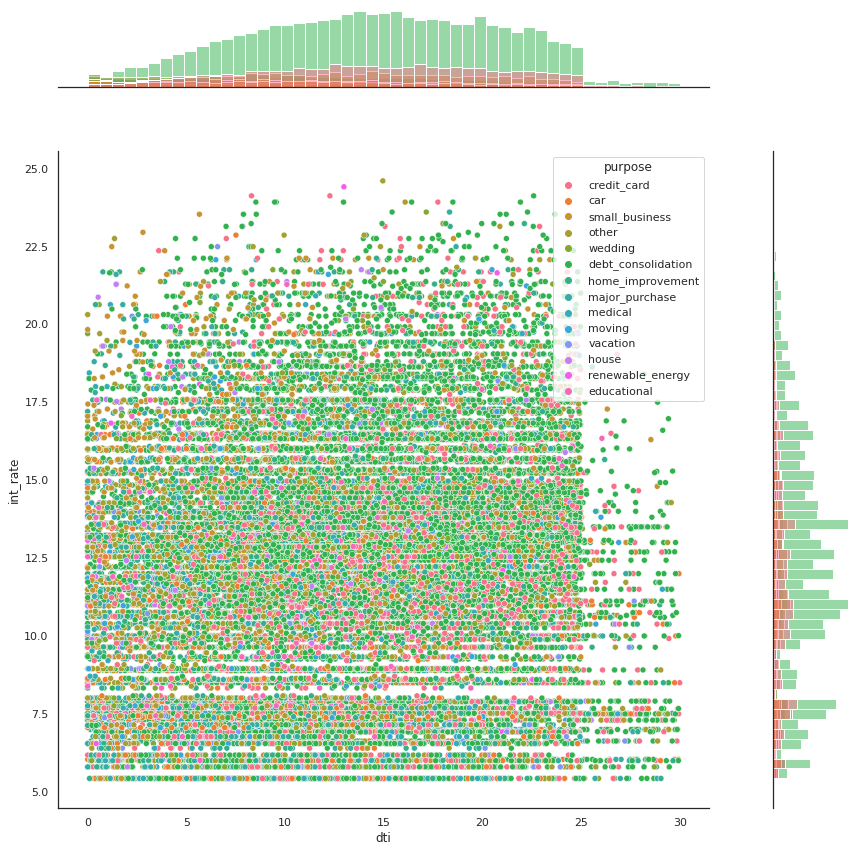

In [258]:
g = sns.JointGrid(data=dfplt, x="dti", y="int_rate", hue = 'purpose', height =12, space = .8 )
g.plot(sns.scatterplot, sns.histplot)

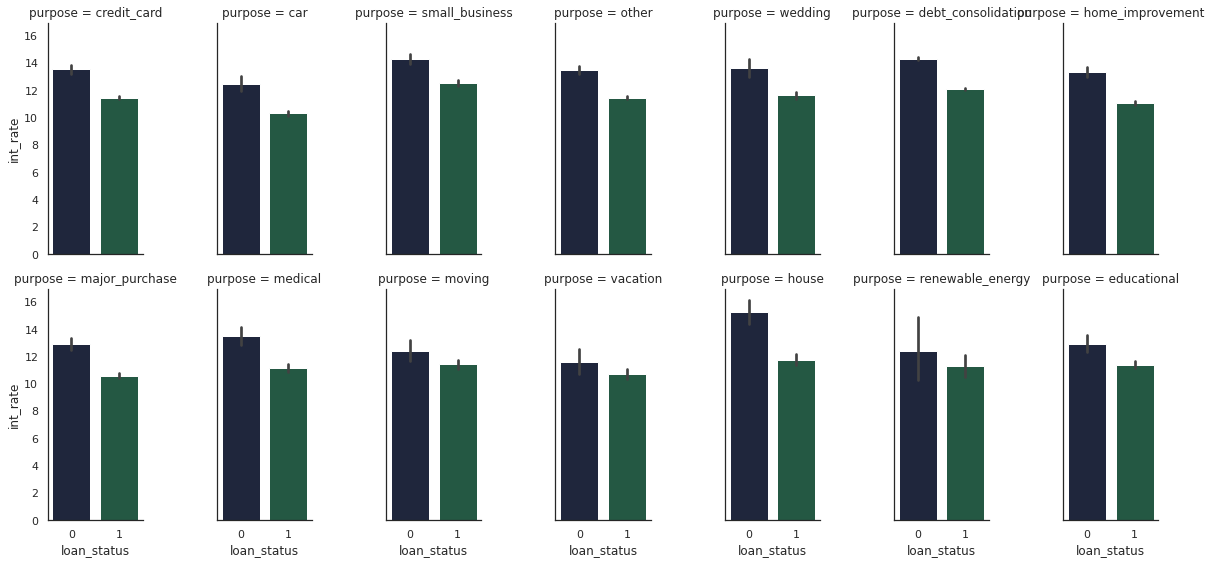

In [259]:
g = sns.catplot(
    data=dfplt, x="loan_status", y="int_rate", col="purpose",
    kind="bar", height=4, aspect=.6,col_wrap= 7)

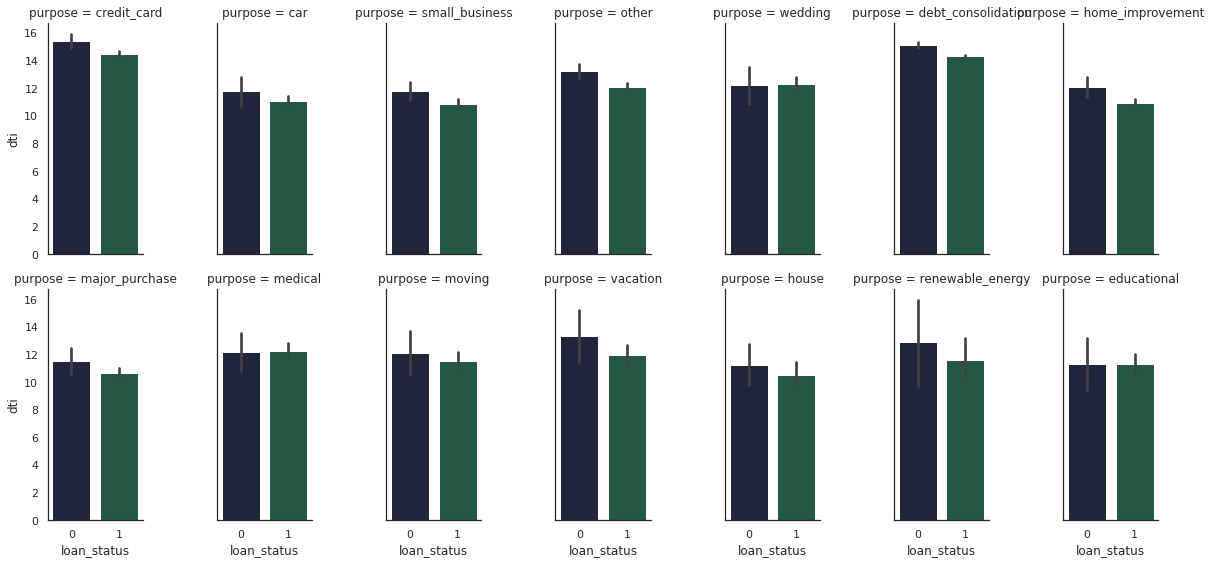

In [260]:
g = sns.catplot(
    data=dfplt, x="loan_status", y="dti", col="purpose",
    kind="bar", height=4, aspect=.6,col_wrap= 7)

Exploring Correlation of the Features to the Interest Rate

In [261]:
dfplt['loan_status'].value_counts()

1    32286
0     5389
Name: loan_status, dtype: int64

In [262]:
plot_num = grid_avg.select_dtypes(include='number')
plot_num = plot_num.astype(float)

In [263]:
target_corr = plot_num.corr()['loan_status'].drop('loan_status').sort_values()

In [264]:
target_corr

int_rate         -0.210814
inq_last_6mths   -0.070536
loan_amnt        -0.062140
dti              -0.042815
installment      -0.030309
emp_length       -0.016195
open_acc          0.005667
annual_inc        0.038175
Name: loan_status, dtype: float64

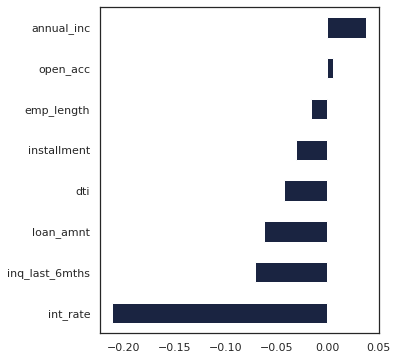

In [265]:
target_corr.plot(kind = 'barh', figsize=(5,6))

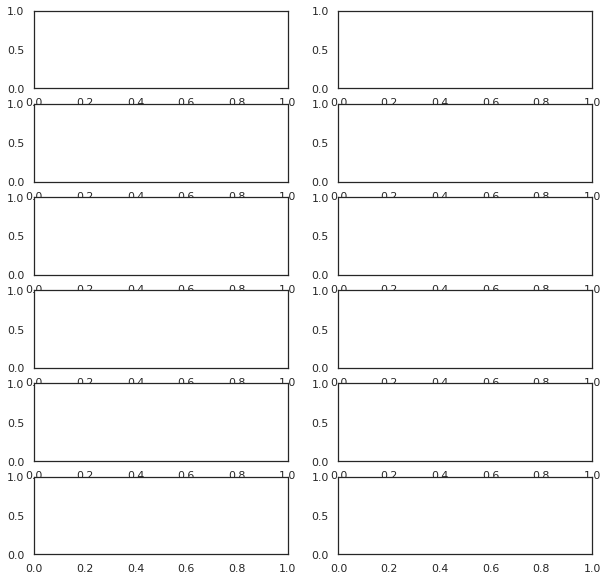

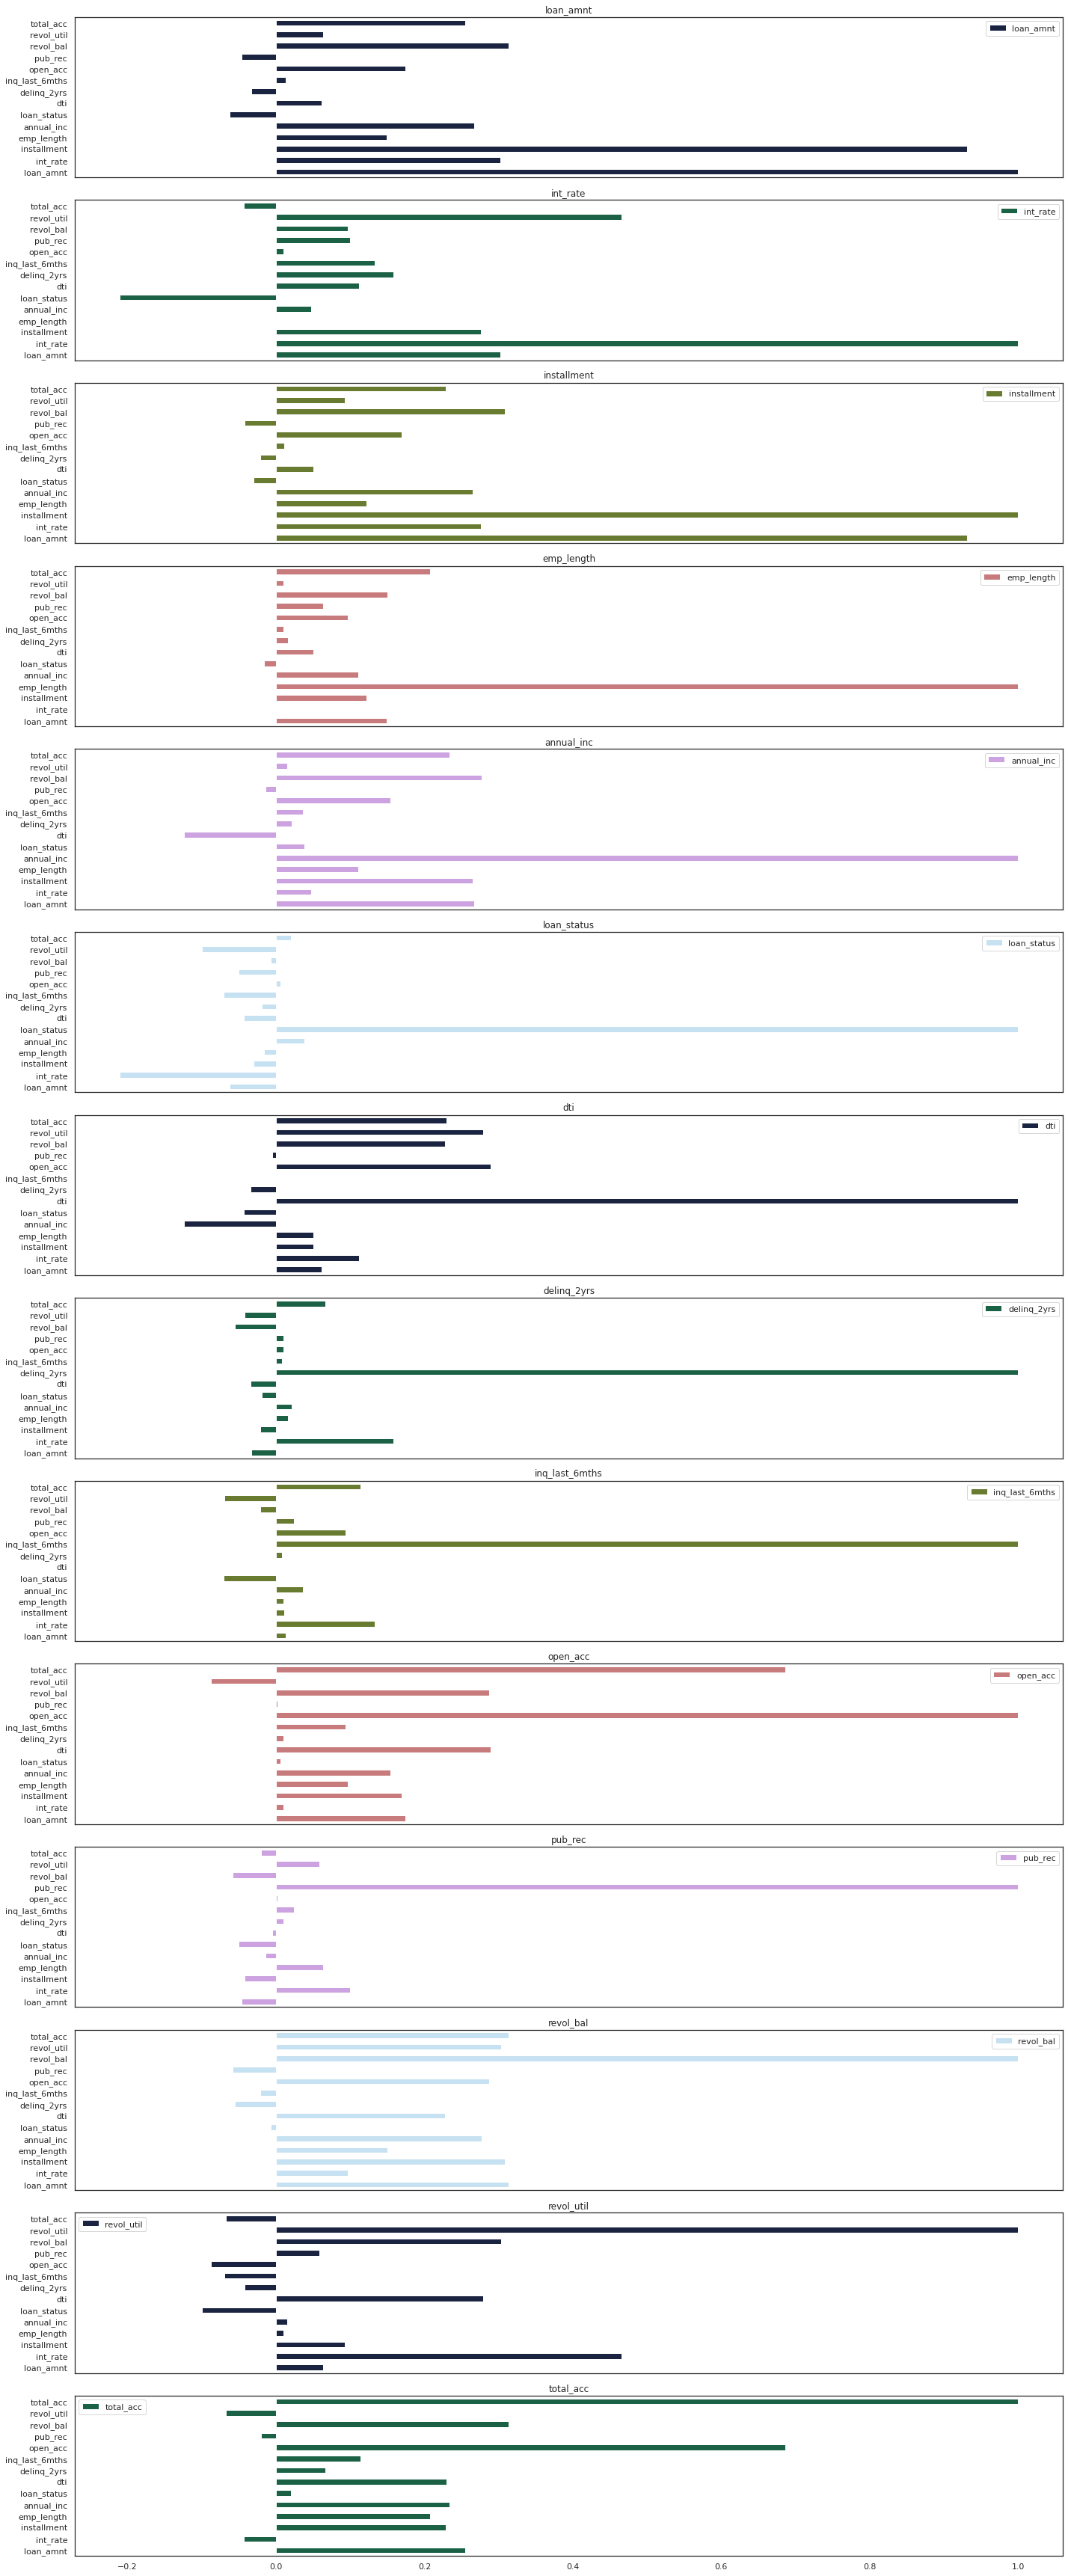

In [266]:
# HOw to make this 2 cols ?
fig, axes = plt.subplots(figsize=(10,10),nrows=6, ncols=2)

dfplt.corr().plot(kind= 'barh', subplots = True)
plt.tight_layout()

In [267]:
# DF Correlations
dfplt.corr()[:-1]

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
loan_amnt,1.000000,0.302177,0.931194,0.149174,0.266899,-0.062140,0.061743,-0.033360,0.012668,0.173918,-0.046635,0.313120,0.063511,0.255149
int_rate,0.302177,1.000000,0.276520,0.001245,0.047552,-0.210814,0.112335,0.158544,0.132808,0.010009,0.099678,0.096553,0.465558,-0.043261
installment,0.931194,0.276520,1.000000,0.121952,0.265300,-0.030309,0.050679,-0.021090,0.011174,0.169367,-0.042427,0.308852,0.092806,0.228731
emp_length,0.149174,0.001245,0.121952,1.000000,0.111061,-0.016195,0.050170,0.015793,0.009730,0.096491,0.063772,0.149878,0.009764,0.207424
annual_inc,0.266899,0.047552,0.265300,0.111061,1.000000,0.038175,-0.123911,0.021177,0.036252,0.154698,-0.014535,0.277272,0.015274,0.233577
loan_status,-0.062140,-0.210814,-0.030309,-0.016195,0.038175,1.000000,-0.042815,-0.019279,-0.070536,0.005667,-0.050193,-0.007141,-0.099547,0.020318
dti,0.061743,0.112335,0.050679,0.050170,-0.123911,-0.042815,1.000000,-0.034532,0.000395,0.289123,-0.004983,0.227472,0.279154,0.230108
delinq_2yrs,-0.033360,0.158544,-0.021090,0.015793,0.021177,-0.019279,-0.034532,1.000000,0.008393,0.010478,0.010362,-0.055196,-0.042226,0.066141
inq_last_6mths,0.012668,0.132808,0.011174,0.009730,0.036252,-0.070536,0.000395,0.008393,1.000000,0.093842,0.023881,-0.020979,-0.069372,0.114262
open_acc,0.173918,0.010009,0.169367,0.096491,0.154698,0.005667,0.289123,0.010478,0.093842,1.000000,0.002337,0.287053,-0.087397,0.685992


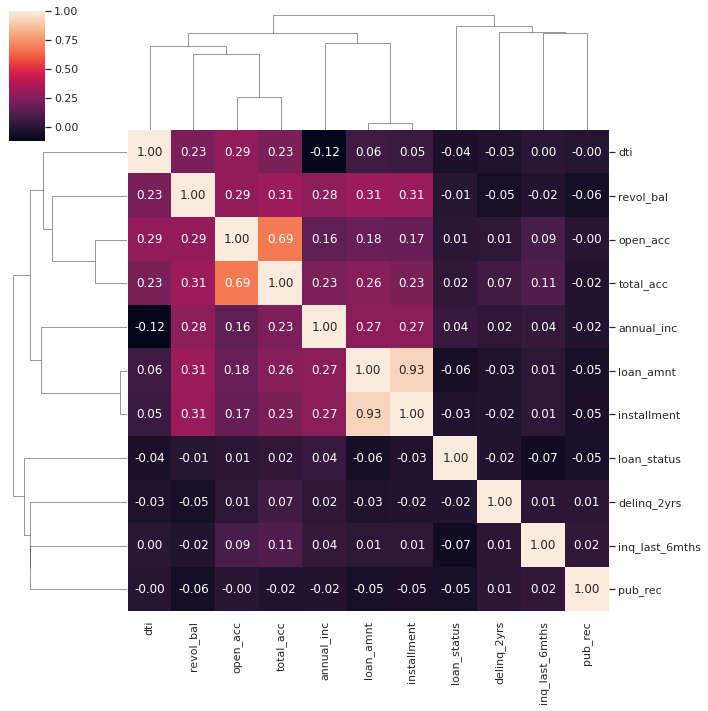

In [268]:
corr = dfplt.corr()
corr_features = corr.columns.tolist()
sns.clustermap(df[corr_features].corr(),
               annot = True,
               fmt = '.2f')

# Modelling  🤖

In [269]:
# Copy of the processed dataset 

loans = dff_encoded.copy()

In [270]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 39785
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37675 non-null  float64
 1   int_rate                             37675 non-null  float64
 2   installment                          37675 non-null  float64
 3   emp_length                           37675 non-null  int64  
 4   annual_inc                           37675 non-null  float64
 5   loan_status                          37675 non-null  int64  
 6   dti                                  37675 non-null  float64
 7   delinq_2yrs                          37675 non-null  float64
 8   inq_last_6mths                       37675 non-null  float64
 9   open_acc                             37675 non-null  float64
 10  pub_rec                              37675 non-null  float64
 11  revol_bal                   

### Picking an Error Metric 

Problem Statement : 

Build a machine learning model that can accurately predict `if a borrower will pay off their loan on time or not?`

        Determining the most Important metric for this task :


loan_status|loan_status(actual)|Prediction|Error_type | Consequence | Implication 
----------|---------| --------| -------- | -------- | ----------
**Defaulted** | **0** | **1** | **False Positive** | **Predicted loan will be paid but it wasn't.** | Loan Funded but Defaulted ⬅
Paid      | 1 | 1 | True Positive  | |Loan Funded and Paid
Defaulted | 0 | 0 | True Negative  | | Loan Not Funded & wouldnt have been pain back
Paid      | 1 | 0 | False Negative | Predicted loan won't be paid but it was paid. | Loan Not Funded but would have been Paid back

- False Positive will result in money lost as funded loans won't be paid. 
- False Negative *potential* money is lost, as loans that would have been paid off wouldn't have got funded.


> Erring on the side of caution we need to `prioritize Defaults not be classified as Paid` i.e `minimizing False Positives`

- So `High Recall Score `[ True Positive Rate ] & `Low Precision Score`



- True Positive Rate  ✅

$   Recall = TPR  = \frac{ True Positives}{All Positives}  = \frac{ TP }{TP + FN}$   
    - This metric shows the `percentage of loans that should be funded that were funded.`




False Positive Rate ❎

$   Precision = FPR  = \frac{ False Positives}{All Negatives}  = \frac{ FP }{FP + TN} $

-   - This metric shows the `percentage of loans that shouldn't be funded that would be funded`

## Validation Split ✂

In [271]:
cols = loans.columns
# Features 
X = loans.drop(columns= ['loan_status'])

# Target
target = loans['loan_status']

In [272]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=1)

In [273]:
X_train.shape[0]/ loans.shape[0]

0.7499933642999337

In [274]:
y_test.value_counts(normalize = True)

1    0.8537
0    0.1463
Name: loan_status, dtype: float64

Standardizing the Data 


In [275]:
# Instantiate Encoders
#https://scikit-learn.org/stable/modules/preprocessing.html
scaler = preprocessing.StandardScaler().fit(X_train)

In [276]:
scaler

StandardScaler()

In [277]:
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Predictions Models ⚖

In [278]:
# Evaluating a model

def classification_report(model, X_test, y_test,
                 classes = None,
                 figsize = (20,5)):
  test_pred = model.predict(X_test)
  print(metrics.classification_report(y_test,test_pred, target_names = classes))
  
  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

  ConfusionMatrixDisplay.from_estimator(model,X_test, y_test,
                                             display_labels=classes,
                                             normalize = None,ax=ax[0])
  ax[0].set_title(f'Confusion Matrix for {model}')
  ax[0].xaxis.set_ticklabels(['Default', 'Paid']); 
  ax[0].yaxis.set_ticklabels(['Default', 'Paid']);


  ConfusionMatrixDisplay.from_estimator(model,X_test, y_test,
                                             display_labels=classes,
                                             normalize = 'true',ax=ax[1])
   
  ax[1].set_title(f'Confusion Matrix for {model} - Normalized')
  ax[1].xaxis.set_ticklabels(['Default', 'Paid']); 
  ax[1].yaxis.set_ticklabels(['Default', 'Paid']);

  plt.show()

### Logistic Regression Classifier

In [279]:
# Logistic Regression
lr = LogisticRegression()

In [280]:
lr.fit(X_train, y_train)

LogisticRegression()

In [281]:
# Saving the model predictions

lr_preds = lr.predict(X_train)

#### Evaluation ✏

In [282]:
print(f"Train Accuracy : {accuracy_score(y_train, lr.predict(X_train)):.4f}")
print(f"Test Accuracy : {accuracy_score(y_test, lr.predict(X_test)):.4f}")

Train Accuracy : 0.8579
Test Accuracy : 0.8552


              precision    recall  f1-score   support

           0       0.49      0.01      0.02      4011
           1       0.86      1.00      0.92     24245

    accuracy                           0.86     28256
   macro avg       0.67      0.51      0.47     28256
weighted avg       0.81      0.86      0.80     28256



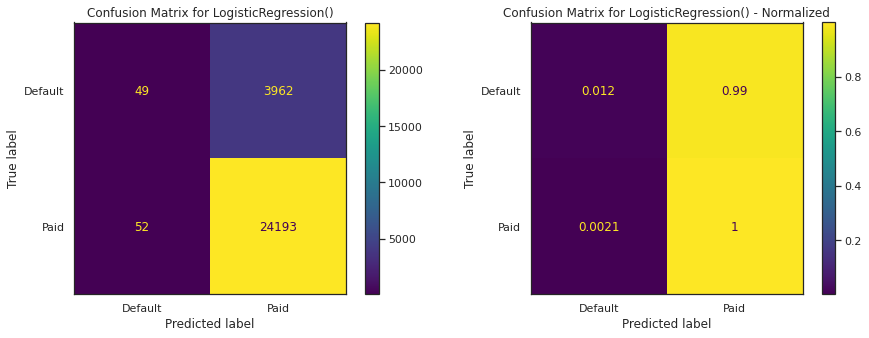

In [283]:
# Train Set Evaluation 
classification_report(lr, X_train,y_train)

              precision    recall  f1-score   support

           0       0.68      0.02      0.04      1378
           1       0.86      1.00      0.92      8041

    accuracy                           0.86      9419
   macro avg       0.77      0.51      0.48      9419
weighted avg       0.83      0.86      0.79      9419



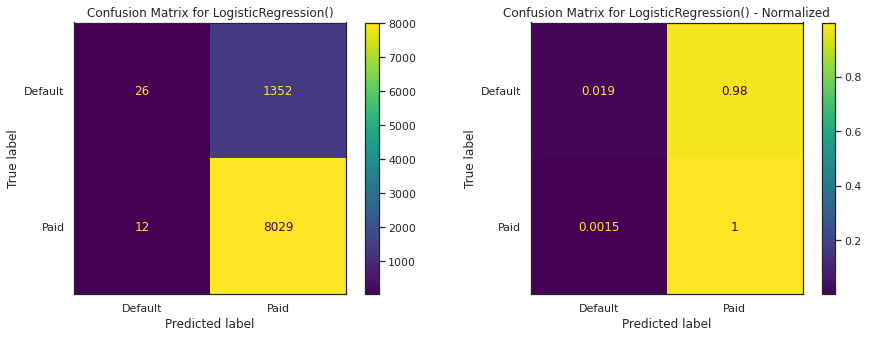

In [284]:
# Test Set Evaluation
classification_report(lr, X_test,y_test)

In [285]:
# Sensitivity of the model 
# Save confusion MAtrix

tn,fp,fn,tp = confusion_matrix(y_test, lr.predict(X_test)).ravel()

sensitivity = tp/(tp+fn)
print(f"Sensitivity: {sensitivity:.4f}")

Sensitivity: 0.9985


In [286]:
#Specificity 
specificity = tn/(tn+fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.0189


Adjusting Decision Thresholds

**ROC curve**

An ROC curve (receiver operating characteristic curve) is a graph showing `the performance of a classification model at all classification thresholds`. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

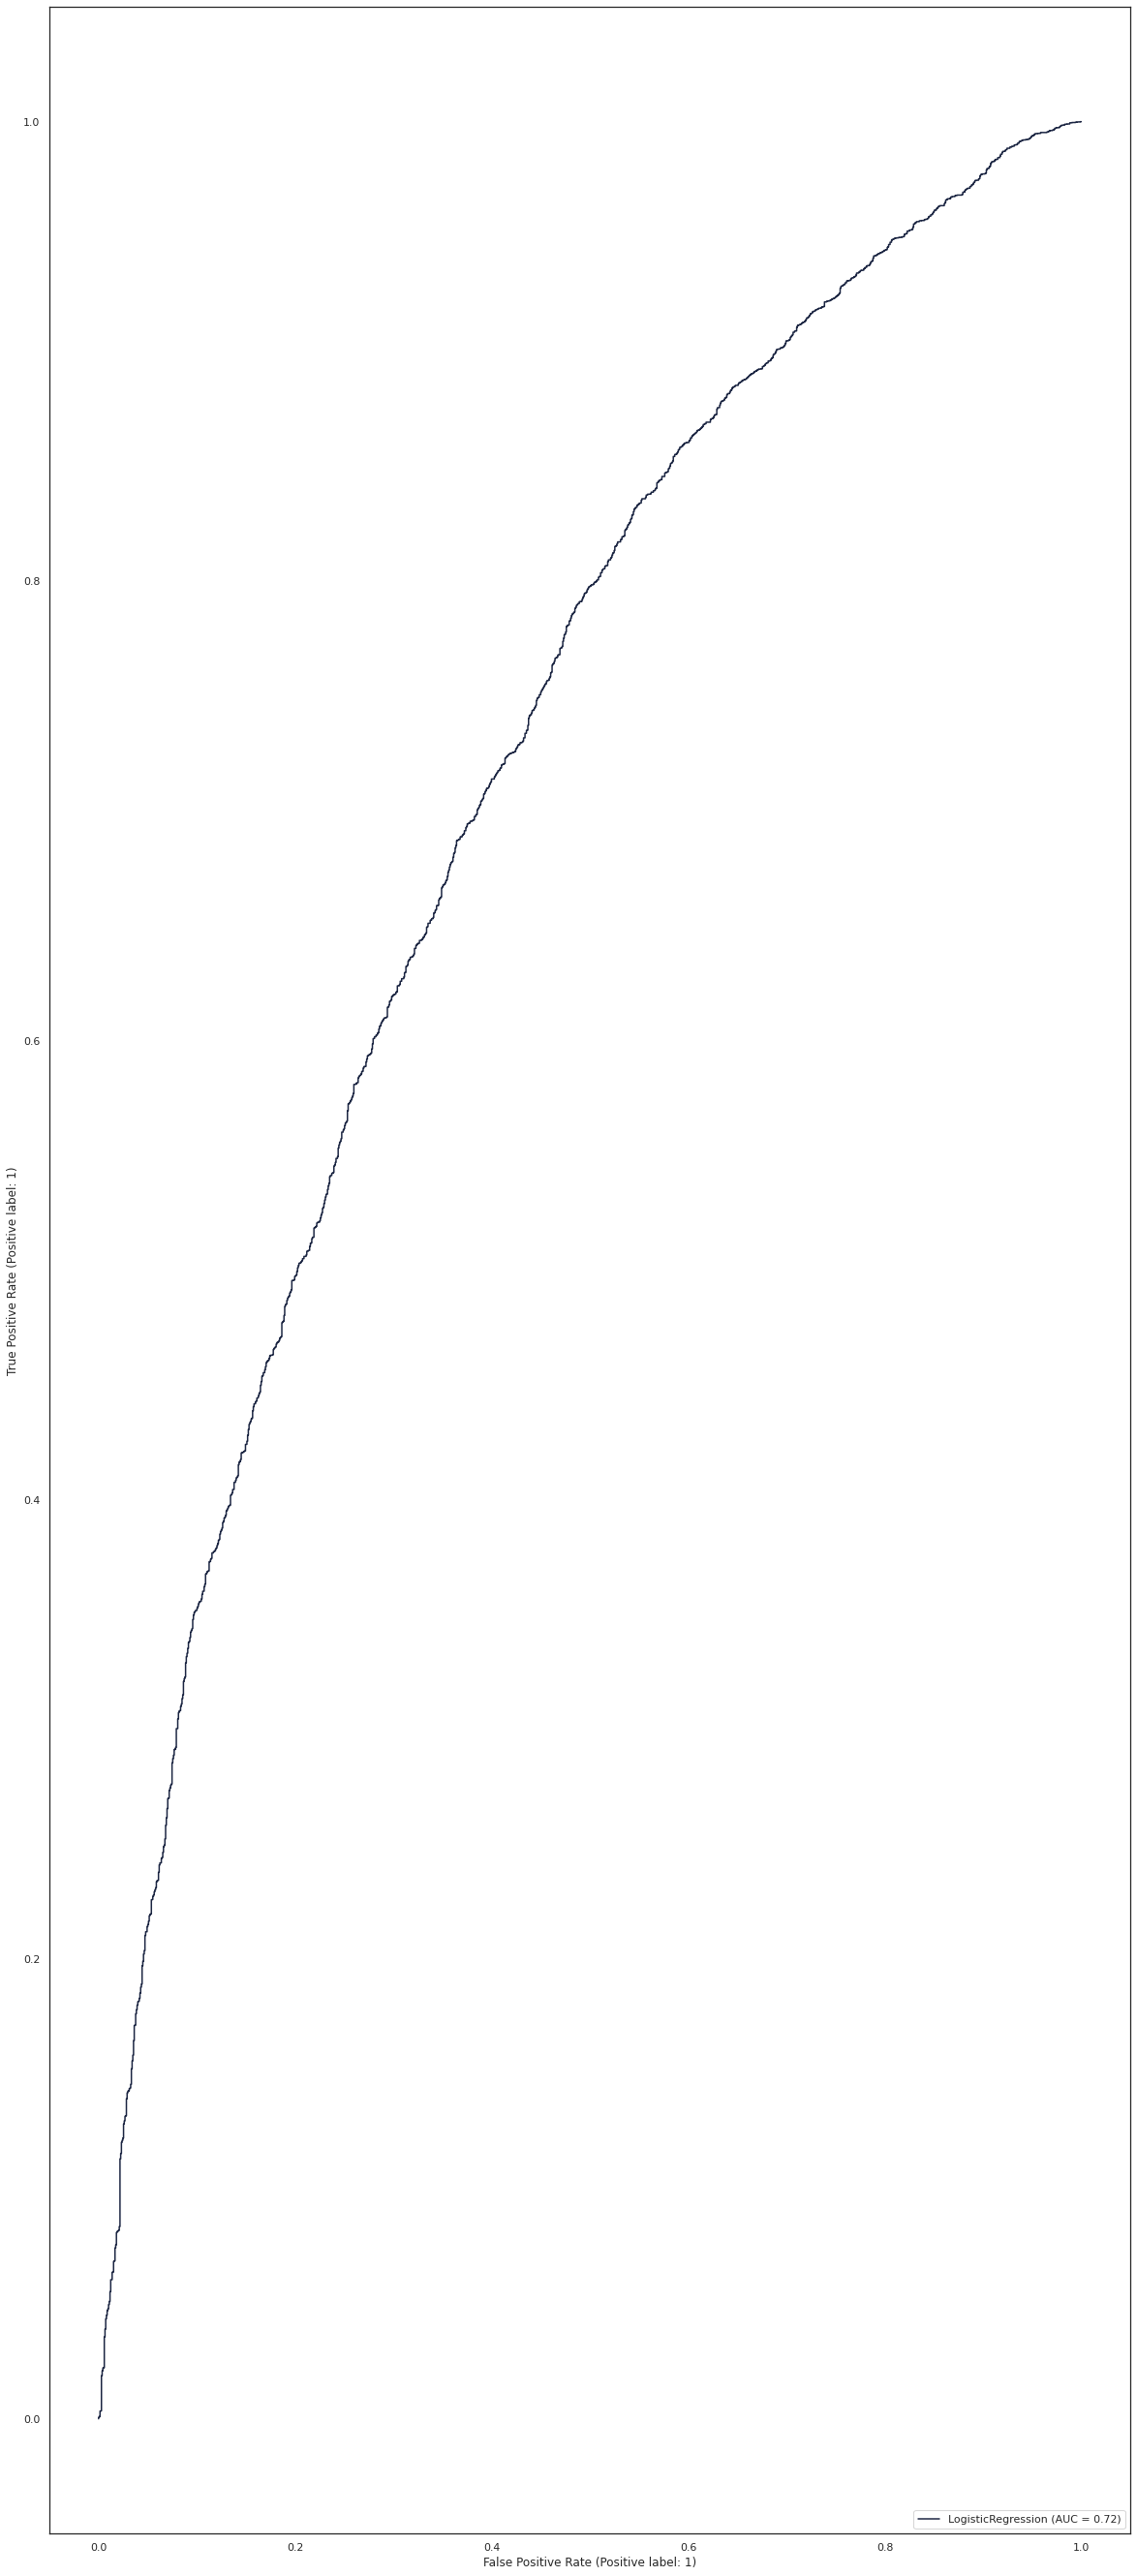

In [287]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)

- Not much improvement

### Cross Validation 🔀

Let's apply Cross Validation to counter overfitting. 

In [288]:
scores = cross_val_score(lr, X_train, y_train, cv=3)
print(f'Accuracy scores for each fold are: {scores.round(2)}')
print(f'Average accuracy across folds is {np.mean(scores)}')

Accuracy scores for each fold are: [0.86 0.86 0.86]
Average accuracy across folds is 0.8573753804921312


### Tuning the Logistic Regression base model 🔧

In [289]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [290]:
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01],
          'solver' : ['newton-cg','liblinear']
          }

In [291]:
%time
lr_tuned = LogisticRegression(class_weight= 'balanced')

# Grid Search to find the best hyperparameters

gs = GridSearchCV(lr_tuned, params, cv = 5)
gs.fit(X_train,y_train)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 8.82 µs


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear']})

#### Dealing with Imbalance 
[More on this...](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression)

Our priority here was to `reduce False Positives` as much as possible. With that in minnd... 

Setting the `class_weight` parameter to `balanced` when creating the `LogisticRegression` instance tells our model to 

> `penalize the misclassification of the minority class during the training process.` 

The penalty means that 

- The logistic regression classifier pays more attention to correctly classifying rows where `loan_status is 0`. 
- This `lowers accuracy when loan_status is 1`, but `increases accuracy when loan_status is 0`.


In [292]:
# Best Hyperparameters

gs.best_params_

{'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [293]:
# Best Version of the model 
lr_tuned = gs.best_estimator_

In [294]:
# Refit Tuned model on Training set

lr_tuned.fit(X_train,y_train)

LogisticRegression(C=0.0001, class_weight='balanced', solver='newton-cg')

              precision    recall  f1-score   support

           0       0.24      0.59      0.34      4011
           1       0.91      0.68      0.78     24245

    accuracy                           0.67     28256
   macro avg       0.57      0.64      0.56     28256
weighted avg       0.81      0.67      0.72     28256



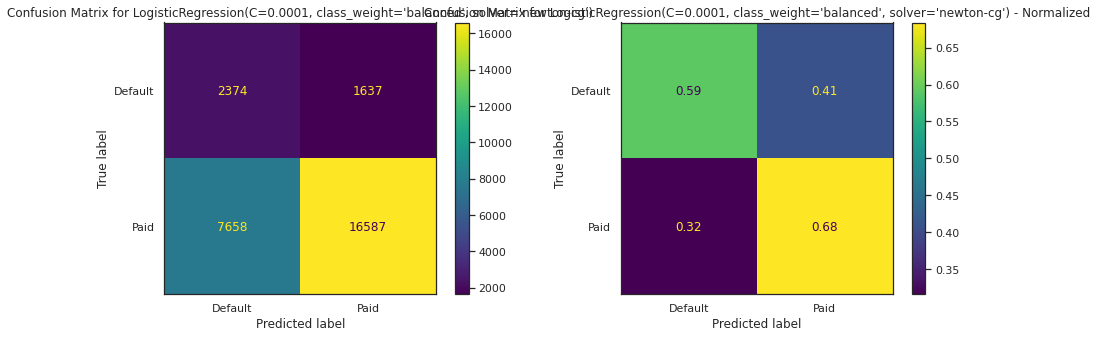

In [295]:
classification_report(lr_tuned, X_train,y_train)

              precision    recall  f1-score   support

           0       0.25      0.61      0.36      1378
           1       0.91      0.69      0.79      8041

    accuracy                           0.68      9419
   macro avg       0.58      0.65      0.57      9419
weighted avg       0.82      0.68      0.72      9419



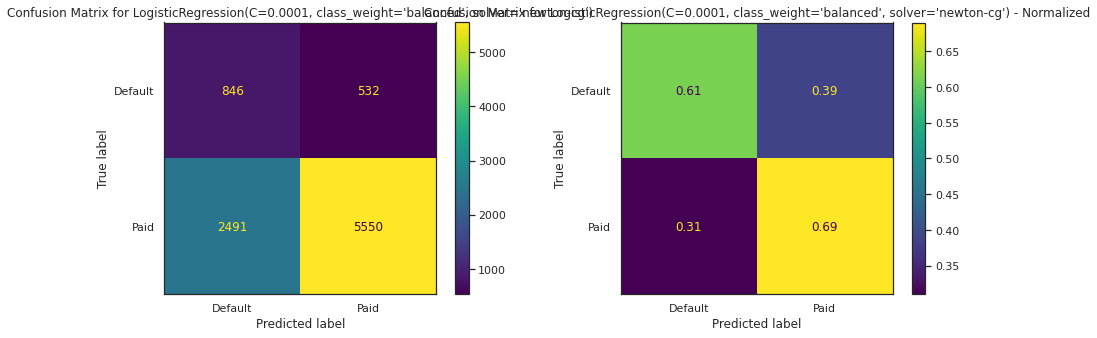

In [296]:
classification_report(lr_tuned, X_test,y_test)

Summary

By balancing the classes, we have managed to `reduced the false positive rate.` Which was our goal. 

- `Our true positive rate is now around 69%`, and our `false positive rate is around 39%`. 

- As a major consequence of doing this the `False Negative & True Negative errors have gone up.`  
    - What this means is `lesser loans are likely to be approved` and supports a conservative investor's standpoint.
    
    -  Model is doing a `better job of avoiding bad loans`.
    
    - However, `only 69% of loans (true positive rate), will get funded meaning loss of potential money`.